In [11]:
import pandas as pd
import numpy as np
import random
import requests

import fastf1 as ff1
from fastf1 import plotting

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
round = 22
year = 2023

In [2]:
def ergast_retrieve(api_endpoint: str):
    url = f'https://ergast.com/api/f1/{api_endpoint}.json'
    response = requests.get(url).json()
    
    return response['MRData']

In [8]:
all_championship_standings = pd.DataFrame()

driver_team_mapping = {}

for i in range(1, round + 1):
    race = ergast_retrieve(f'{year}/{i}/driverStandings')
    
    standings = race['StandingsTable']['StandingsLists'][0]['DriverStandings']
    
    current_round = {'round': i}
    
    for i in range(len(standings)):
        driver = standings[i]['Driver']['code']
        position = standings[i]['position']
        
        current_round[driver] = int(position)
        
        driver_team_mapping[driver] = standings[i]['Constructors'][0]['name']
        
    current_round = pd.DataFrame([current_round])

    all_championship_standings = pd.concat([all_championship_standings, current_round], ignore_index=True)
    
all_championship_standings = all_championship_standings.set_index('round')

In [9]:
all_championship_standings_melted = pd.melt(all_championship_standings.reset_index(), ['round'])

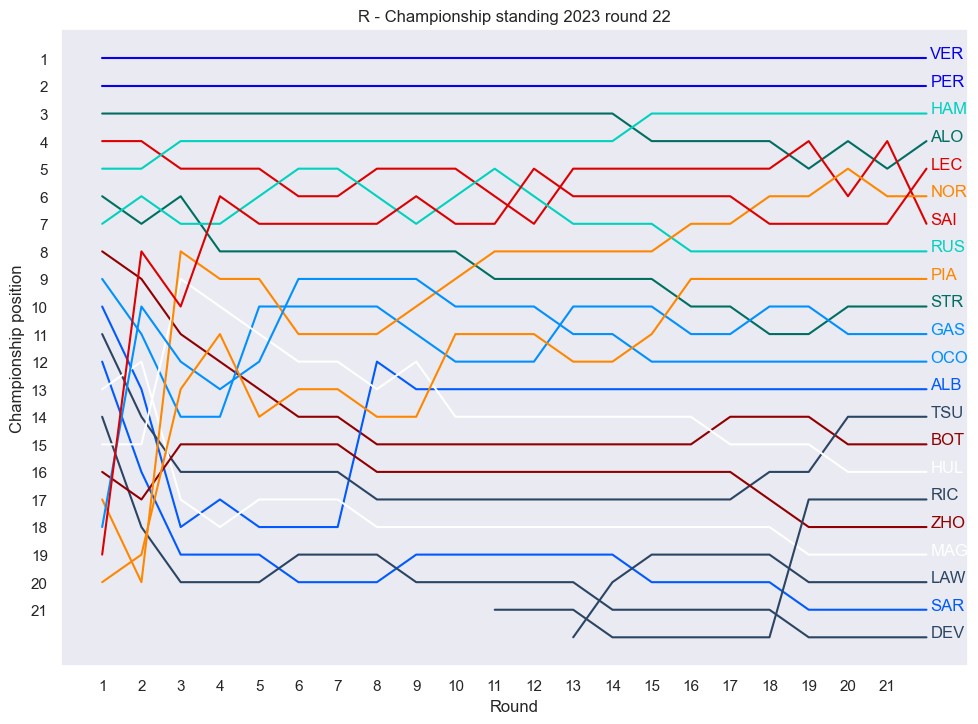

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

fig, ax = plt.subplots()

title = f'R - Championship standing {str(year)} round {str(round)}'

ax.set_title(title)

for driver in pd.unique(all_championship_standings_melted['variable']):
    sns.lineplot(
        x='round', 
        y='value', 
        data=all_championship_standings_melted.loc[all_championship_standings_melted['variable']==driver], 
        color=ff1.plotting.team_color(driver_team_mapping[driver])
    )

ax.invert_yaxis()

ax.set_xticks(range(1, round))
ax.set_yticks(range(1, 22))

ax.set_xlabel("Round")
ax.set_ylabel("Championship position")

ax.grid(False)


for line, name in zip(ax.lines, all_championship_standings.columns.tolist()):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
        
    text = ax.annotate(
        name,
        xy=(x + 0.1, y),
        xytext=(0, 0),
        color=line.get_color(),
        xycoords=(
            ax.get_xaxis_transform(),
            ax.get_yaxis_transform()
        ),
        textcoords="offset points"
    )

plt.savefig(f'Figures/{title}')

plt.show()